In [1]:
# If additional packages are needed but are not installed by default, uncomment the last two lines of this cell
# and replace <package list> with a list of additional packages.
# This will ensure the notebook has all the dependencies and works everywhere

import sys
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split

#classification ml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#model selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

#sklearn score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

#others
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [2]:
# Libraries
import pandas as pd
pd.set_option("display.max_columns", 101)

In [ ]:
# <H1>Data Wrangling & Visualization</H1>

In [3]:
# The dataset is already loaded below
data = pd.read_csv("/content/hotel_bookings.csv")

In [4]:
data.head()

,id,is_cancelled,lead_time,arrival_week,duration,segment,prev_cancel,booking_changes,deposit,waiting_period,per_Day_price,parking,special_request,cust_type
0,1,0,342,27,0,Direct,0,3,No Deposit,0,0.0,0,0,Transient
1,2,0,737,27,0,Direct,0,4,No Deposit,0,0.0,0,0,Transient
2,3,0,7,27,1,Direct,0,0,No Deposit,0,75.0,0,0,Transient
3,4,0,13,27,1,Corporate,0,0,No Deposit,0,75.0,0,0,Transient
4,5,0,14,27,2,Online TA,0,0,No Deposit,0,98.0,0,1,Transient


In [5]:
#Explore columns
data.columns

Index(['id', 'is_cancelled', 'lead_time', 'arrival_week', 'duration',
       'segment', 'prev_cancel', 'booking_changes', 'deposit',
       'waiting_period', 'per_Day_price', 'parking', 'special_request',
       'cust_type'],
      dtype='object')

In [6]:
data.describe()

,id,is_cancelled,lead_time,arrival_week,duration,prev_cancel,booking_changes,waiting_period,per_Day_price,parking,special_request
count,82584.000000,82584.000000,82584.000000,82584.000000,82584.000000,82584.000000,82584.000000,82584.000000,82584.000000,82584.000000,82584.000000
mean,41292.500000,0.531980,112.702594,28.183910,3.641722,0.119987,0.202557,3.044282,97.887379,0.071249,0.467282
std,23840.091653,0.498979,112.046011,13.722642,2.806403,1.008675,0.632728,20.308573,53.959556,0.261165,0.746202
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,20646.750000,0.000000,21.000000,17.000000,2.000000,0.000000,0.000000,0.000000,62.000000,0.000000,0.000000
50%,41292.500000,1.000000,77.000000,29.000000,3.000000,0.000000,0.000000,0.000000,89.000000,0.000000,0.000000
75%,61938.250000,1.000000,174.000000,39.000000,4.000000,0.000000,0.000000,0.000000,120.700000,0.000000,1.000000
max,82584.000000,1.000000,737.000000,53.000000,69.000000,26.000000,20.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
#based on this information, there is no missing data; so, no need to worry about the filling the missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82584 entries, 0 to 82583
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               82584 non-null  int64  
 1   is_cancelled     82584 non-null  int64  
 2   lead_time        82584 non-null  int64  
 3   arrival_week     82584 non-null  int64  
 4   duration         82584 non-null  int64  
 5   segment          82584 non-null  object 
 6   prev_cancel      82584 non-null  int64  
 7   booking_changes  82584 non-null  int64  
 8   deposit          82584 non-null  object 
 9   waiting_period   82584 non-null  int64  
 10  per_Day_price    82584 non-null  float64
 11  parking          82584 non-null  int64  
 12  special_request  82584 non-null  int64  
 13  cust_type        82584 non-null  object 
dtypes: float64(1), int64(10), object(3)
memory usage: 8.8+ MB


In [9]:
#while convert the categorical varibles into Numerical varialble, noticed an issue in the data 
#data has spaces in the trailing end and that makes the column names with trailing spaces

data["deposit2"] = data["deposit"].map(lambda x : x.strip())
data["cust_type2"] = data["cust_type"].map(lambda x : x.strip())
data["segment2"] = data["segment"].map(lambda x : x.strip())

In [10]:
data.head()

,id,is_cancelled,lead_time,arrival_week,duration,segment,prev_cancel,booking_changes,deposit,waiting_period,per_Day_price,parking,special_request,cust_type,deposit2,cust_type2,segment2
0,1,0,342,27,0,Direct,0,3,No Deposit,0,0.0,0,0,Transient,No Deposit,Transient,Direct
1,2,0,737,27,0,Direct,0,4,No Deposit,0,0.0,0,0,Transient,No Deposit,Transient,Direct
2,3,0,7,27,1,Direct,0,0,No Deposit,0,75.0,0,0,Transient,No Deposit,Transient,Direct
3,4,0,13,27,1,Corporate,0,0,No Deposit,0,75.0,0,0,Transient,No Deposit,Transient,Corporate
4,5,0,14,27,2,Online TA,0,0,No Deposit,0,98.0,0,1,Transient,No Deposit,Transient,Online TA


In [ ]:
 # Visualization, Modeling, Machine Learning

In [11]:
data.is_cancelled.value_counts()

1    43933
0    38651
Name: is_cancelled, dtype: int64

In [12]:
data.segment.value_counts()

Online TA        35555
Groups           17245
Offline TA/TO    17044
Direct            8506
Corporate         3718
Complementary      473
Aviation            41
Undefined            2
Name: segment, dtype: int64

In [13]:
data.deposit.value_counts()

No Deposit    68045
Non Refund    14380
Refundable      159
Name: deposit, dtype: int64

In [14]:
data.cust_type.value_counts()

Transient          61214
Transient-Party    16977
Contract            3946
Group                446
Tran                   1
Name: cust_type, dtype: int64

In [15]:
#Before generate the the corelation matrix, the categorical variables needs to be converted into Numertical variables

#******************************************
# *** 1 hot encoding is being used here ***
#******************************************

#1 segment
data_seg = data["segment2"]

dum_df1 = pd.get_dummies(data_seg, columns=["segment2"], prefix="seg")
dum_df1.head(10)

#add these features into the main training df
data = data.join(dum_df1)

data.head()

,id,is_cancelled,lead_time,arrival_week,duration,segment,prev_cancel,booking_changes,deposit,waiting_period,per_Day_price,parking,special_request,cust_type,deposit2,cust_type2,segment2,seg_Aviation,seg_Complementary,seg_Corporate,seg_Direct,seg_Groups,seg_Offline TA/TO,seg_Online TA,seg_Undefined
0,1,0,342,27,0,Direct,0,3,No Deposit,0,0.0,0,0,Transient,No Deposit,Transient,Direct,0,0,0,1,0,0,0,0
1,2,0,737,27,0,Direct,0,4,No Deposit,0,0.0,0,0,Transient,No Deposit,Transient,Direct,0,0,0,1,0,0,0,0
2,3,0,7,27,1,Direct,0,0,No Deposit,0,75.0,0,0,Transient,No Deposit,Transient,Direct,0,0,0,1,0,0,0,0
3,4,0,13,27,1,Corporate,0,0,No Deposit,0,75.0,0,0,Transient,No Deposit,Transient,Corporate,0,0,1,0,0,0,0,0
4,5,0,14,27,2,Online TA,0,0,No Deposit,0,98.0,0,1,Transient,No Deposit,Transient,Online TA,0,0,0,0,0,0,1,0


In [16]:
#2 cust_type (use the second column with he the spaces at the end gor trimmed)
data_ctyp = data["cust_type2"]

dum_df2 = pd.get_dummies(data_ctyp, columns=["cust_type2"], prefix="ctyp")
dum_df2.head(10)

#add these features into the main training df
data = data.join(dum_df2)

data.head()

,id,is_cancelled,lead_time,arrival_week,duration,segment,prev_cancel,booking_changes,deposit,waiting_period,per_Day_price,parking,special_request,cust_type,deposit2,cust_type2,segment2,seg_Aviation,seg_Complementary,seg_Corporate,seg_Direct,seg_Groups,seg_Offline TA/TO,seg_Online TA,seg_Undefined,ctyp_Contract,ctyp_Group,ctyp_Tran,ctyp_Transient,ctyp_Transient-Party
0,1,0,342,27,0,Direct,0,3,No Deposit,0,0.0,0,0,Transient,No Deposit,Transient,Direct,0,0,0,1,0,0,0,0,0,0,0,1,0
1,2,0,737,27,0,Direct,0,4,No Deposit,0,0.0,0,0,Transient,No Deposit,Transient,Direct,0,0,0,1,0,0,0,0,0,0,0,1,0
2,3,0,7,27,1,Direct,0,0,No Deposit,0,75.0,0,0,Transient,No Deposit,Transient,Direct,0,0,0,1,0,0,0,0,0,0,0,1,0
3,4,0,13,27,1,Corporate,0,0,No Deposit,0,75.0,0,0,Transient,No Deposit,Transient,Corporate,0,0,1,0,0,0,0,0,0,0,0,1,0
4,5,0,14,27,2,Online TA,0,0,No Deposit,0,98.0,0,1,Transient,No Deposit,Transient,Online TA,0,0,0,0,0,0,1,0,0,0,0,1,0


In [17]:
#3 deposit (use the second column with he the spaces at the end gor trimmed)
data_dep = data["deposit2"]

dum_df3 = pd.get_dummies(data_dep, columns=["deposit2"], prefix="dep")
dum_df3.head(10)

#add these features into the main training df
data = data.join(dum_df3)

data.head()

,id,is_cancelled,lead_time,arrival_week,duration,segment,prev_cancel,booking_changes,deposit,waiting_period,per_Day_price,parking,special_request,cust_type,deposit2,cust_type2,segment2,seg_Aviation,seg_Complementary,seg_Corporate,seg_Direct,seg_Groups,seg_Offline TA/TO,seg_Online TA,seg_Undefined,ctyp_Contract,ctyp_Group,ctyp_Tran,ctyp_Transient,ctyp_Transient-Party,dep_No Deposit,dep_Non Refund,dep_Refundable
0,1,0,342,27,0,Direct,0,3,No Deposit,0,0.0,0,0,Transient,No Deposit,Transient,Direct,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,2,0,737,27,0,Direct,0,4,No Deposit,0,0.0,0,0,Transient,No Deposit,Transient,Direct,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
2,3,0,7,27,1,Direct,0,0,No Deposit,0,75.0,0,0,Transient,No Deposit,Transient,Direct,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
3,4,0,13,27,1,Corporate,0,0,No Deposit,0,75.0,0,0,Transient,No Deposit,Transient,Corporate,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
4,5,0,14,27,2,Online TA,0,0,No Deposit,0,98.0,0,1,Transient,No Deposit,Transient,Online TA,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [48]:
#split the train and test data
tr_data, test_data = train_test_split(data, test_size=0.5, random_state=42)
print("Training set count: ", len(tr_data))
print("Test set count: ",len(test_data))

Training set count:  41292
Test set count:  41292


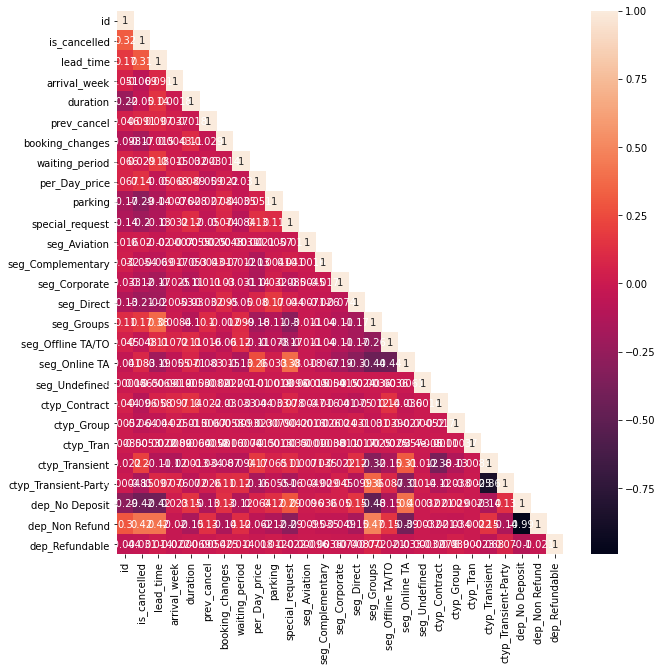

In [49]:
#Corelation Matrix
#1 visualize in a heatmap

tr_cor_mat=tr_data.corr()

tr_mask=np.array(tr_cor_mat)
tr_mask[np.tril_indices_from(tr_mask)] = False

viz1=plt.gcf()
viz1.set_size_inches(10,10)

sb.heatmap(data=tr_cor_mat, mask=tr_mask, annot=True)

In [50]:
#Corelation Matrix
#2 Looks at the values

tr_cor_mat["is_cancelled"].sort_values(ascending=False)

#The below result shows that dep_Non Refund, lead_time, seg_Groups, prev_cancel and ctyp_Transient are the top 5 features which are having high correlation with the cancellation

is_cancelled            1.000000
dep_Non Refund          0.423070
id                      0.320765
lead_time               0.309166
ctyp_Transient          0.200236
seg_Groups              0.170917
per_Day_price           0.138426
prev_cancel             0.090553
seg_Online TA           0.083141
waiting_period          0.028649
seg_Aviation            0.019554
seg_Undefined           0.006517
ctyp_Tran              -0.005256
dep_Refundable         -0.031078
seg_Offline TA/TO      -0.048319
duration               -0.049997
seg_Complementary      -0.054295
ctyp_Group             -0.064043
arrival_week           -0.069027
ctyp_Contract          -0.096118
seg_Corporate          -0.115773
ctyp_Transient-Party   -0.154259
booking_changes        -0.169655
special_request        -0.200483
seg_Direct             -0.206952
parking                -0.291699
dep_No Deposit         -0.417300
Name: is_cancelled, dtype: float64

In [51]:
#I think, this is the time to drop the least corelated features
# Keep the top/ bottom-N features (for this exercise)

tr_data_mdl = tr_data.copy()
#Rename it to make it consitent with other features
tr_data_mdl.rename(columns={'dep_Non Refund':'dep_non_refund'}, inplace=True)
tr_data_mdl.rename(columns={'dep_No Deposit':'dep_no_deposit'}, inplace=True)
tr_data_mdl.rename(columns={'ctyp_Transient-Party':'ctyp_transient_party'}, inplace=True)

features_sel = ['id','is_cancelled','dep_non_refund','lead_time','ctyp_Transient','seg_Groups', 'dep_no_deposit','parking','seg_Direct','special_request','booking_changes','ctyp_transient_party']
tr_data_mdl.drop(tr_data_mdl.columns.difference(features_sel),axis=1,inplace=True)

tr_data_mdl.head()

,id,is_cancelled,lead_time,booking_changes,parking,special_request,seg_Direct,seg_Groups,ctyp_Transient,ctyp_transient_party,dep_no_deposit,dep_non_refund
68883,68884,1,26,0,0,0,0,0,1,0,0,1
47758,47759,1,1,0,0,0,0,0,1,0,1,0
57735,57736,1,267,0,0,0,0,0,1,0,0,1
13347,13348,1,98,0,0,2,0,0,1,0,1,0
12104,12105,1,247,0,0,1,0,0,1,0,1,0


In [52]:
#remove id coulmn from training dataset as this needs to be removed before run the actual prediction
tr_data_mdl.drop(['id'], axis=1, inplace=True)
tr_data_mdl.columns

Index(['is_cancelled', 'lead_time', 'booking_changes', 'parking',
       'special_request', 'seg_Direct', 'seg_Groups', 'ctyp_Transient',
       'ctyp_transient_party', 'dep_no_deposit', 'dep_non_refund'],
      dtype='object')

In [ ]:
# Visualize the top N features and their feature importance.

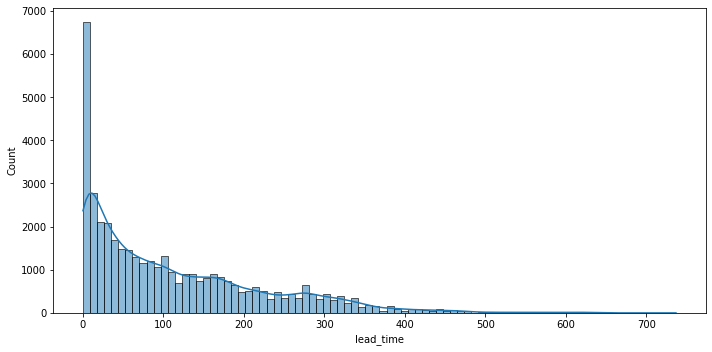

In [53]:
#1 lead Time
# use kde (kernel density estimation)

lead_time = tr_data["lead_time"]

plt.figure(figsize=(10,5))
sb.histplot(lead_time, kde=True)
plt.tight_layout()
plt.show()

In [55]:
# Test Data

test_data_mdl = test_data.copy()
#Rename it to make it consitent with other features
test_data_mdl.rename(columns={'dep_Non Refund':'dep_non_refund'}, inplace=True)
test_data_mdl.rename(columns={'dep_No Deposit':'dep_no_deposit'}, inplace=True)
test_data_mdl.rename(columns={'ctyp_Transient-Party':'ctyp_transient_party'}, inplace=True)

features_sel = ['id','is_cancelled','dep_non_refund','lead_time','ctyp_Transient','seg_Groups', 'dep_no_deposit','parking','seg_Direct','special_request','booking_changes','ctyp_transient_party']
test_data_mdl.drop(test_data_mdl.columns.difference(features_sel),axis=1,inplace=True)

test_data_mdl.head()

,id,is_cancelled,lead_time,booking_changes,parking,special_request,seg_Direct,seg_Groups,ctyp_Transient,ctyp_transient_party,dep_no_deposit,dep_non_refund
52744,52745,1,65,0,0,0,0,0,1,0,1,0
43365,43366,0,74,0,0,0,0,0,0,1,1,0
27212,27213,0,0,0,0,1,0,0,1,0,1,0
24540,24541,0,27,0,1,0,0,0,1,0,1,0
30965,30966,0,87,3,0,2,0,0,0,1,1,0


In [56]:
#remove is_cancelled column
test_data_mdl.drop("is_cancelled",axis=1,inplace=True)

test_data_mdl.head()

,id,lead_time,booking_changes,parking,special_request,seg_Direct,seg_Groups,ctyp_Transient,ctyp_transient_party,dep_no_deposit,dep_non_refund
52744,52745,65,0,0,0,0,0,1,0,1,0
43365,43366,74,0,0,0,0,0,0,1,1,0
27212,27213,0,0,0,1,0,0,1,0,1,0
24540,24541,27,0,1,0,0,0,1,0,1,0
30965,30966,87,3,0,2,0,0,0,1,1,0


In [57]:
tr_data_mdl.head()

,is_cancelled,lead_time,booking_changes,parking,special_request,seg_Direct,seg_Groups,ctyp_Transient,ctyp_transient_party,dep_no_deposit,dep_non_refund
68883,1,26,0,0,0,0,0,1,0,0,1
47758,1,1,0,0,0,0,0,1,0,1,0
57735,1,267,0,0,0,0,0,1,0,0,1
13347,1,98,0,0,2,0,0,1,0,1,0
12104,1,247,0,0,1,0,0,1,0,1,0


In [ ]:
#*******************
#Model Selection
#*******************

#Precision and confusion matrix are the decision factor for the model selection
#To start with, evaluating the below two models

#1 KNN
#2 Random Forest
#3 Gradeient Boost

In [58]:
tr_data_mdl.columns

Index(['is_cancelled', 'lead_time', 'booking_changes', 'parking',
       'special_request', 'seg_Direct', 'seg_Groups', 'ctyp_Transient',
       'ctyp_transient_party', 'dep_no_deposit', 'dep_non_refund'],
      dtype='object')

In [59]:
#validate the data types of all the columns; all are numeric
tr_data_mdl.columns.to_series().groupby(tr_data_mdl.dtypes).groups

{uint8: ['seg_Direct', 'seg_Groups', 'ctyp_Transient', 'ctyp_transient_party', 'dep_no_deposit', 'dep_non_refund'], int64: ['is_cancelled', 'lead_time', 'booking_changes', 'parking', 'special_request']}

In [60]:
len(tr_data_mdl)

41292

In [61]:
#set 25% as test size from the training dataset; this is for train the model
x_train, x_test, y_train, y_test= train_test_split(tr_data_mdl.drop('is_cancelled',axis=1), tr_data_mdl['is_cancelled'], test_size=0.25, random_state=42)

In [62]:
#1 KNN option-1 (default weights --> uniform)
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [63]:
#get the accuracy score
knn_pred=knn.predict(x_test)
score=metrics.accuracy_score(y_test,knn_pred)
print(score)

0.7603409861474377


In [64]:
confusion_matrix(y_test, knn_pred)

array([[3407, 1402],
       [1072, 4442]])

In [65]:
#1 KNN option-2 (default weights --> distance)
knn2 = KNeighborsClassifier(weights='distance')
knn2.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [66]:
#get the accuracy score
knn_pred2=knn2.predict(x_test)
score2=metrics.accuracy_score(y_test,knn_pred2)
print(score2)

0.7674125738641868


In [68]:
confusion_matrix(y_test, knn_pred2)

array([[3521, 1288],
       [1113, 4401]])

In [69]:
#2 Random Forest

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [70]:
#get the accuracy score
rf_pred=rf.predict(x_test)
rf_ascore=metrics.accuracy_score(y_test,rf_pred)
rf_pscore=metrics.precision_score(y_test,rf_pred)
print("Accuracy score : ", rf_ascore)
print("Precision score : ", rf_pscore)

Accuracy score :  0.7898866608544028
Precision score :  0.7946098291351066


In [71]:
confusion_matrix(y_test, rf_pred)

array([[3643, 1166],
       [1003, 4511]])

In [72]:
#get the accuracy score
rf_pred=rf.predict(x_test)
rf_ascore=metrics.accuracy_score(y_test,rf_pred)
rf_pscore=metrics.precision_score(y_test,rf_pred)
print("Accuracy score : ", rf_ascore)
print("Precision score : ", rf_pscore)

Accuracy score :  0.7898866608544028
Precision score :  0.7946098291351066


In [73]:
confusion_matrix(y_test, rf_pred)

array([[3643, 1166],
       [1003, 4511]])

In [74]:
#3 Gradient Boosting
gb = GradientBoostingClassifier()
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores= cross_val_score(gb,x_train, y_train,scoring='accuracy',cv=cv,n_jobs=-1,error_score='raise')
print(mean(n_scores))
print(std(n_scores))

0.7737414920721534
0.009184113687071758


In [75]:
gb.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [79]:
#get the accuracy score
gb_pred=gb.predict(x_test)
print('Prediction: %d' % gb_pred[0])

Prediction: 0


In [ ]:
#Predict

In [80]:
#Random Forest
p_dict={'n_estimators': [500],'n_jobs':[-1],'max_features':["auto","log2"] }
mdl_fin=GridSearchCV(estimator=RandomForestClassifier(), param_grid=p_dict)

mdl_fin.fit(x_train, y_train)
pred=mdl_fin.predict(test_data_mdl.drop('id',axis=1))
is_cancelled={'id':test_data_mdl['id'], 'is_cancelled':pred}

out_final = pd.DataFrame(is_cancelled)
out_final.head()

,id,is_cancelled
52744,52745,1
43365,43366,0
27212,27213,0
24540,24541,0
30965,30966,0


In [81]:
submission_df = out_final.copy()
print(len(submission_df))

41292


In [83]:
#Submission
submission_df.to_csv('/content/submissions.csv',index=False)

In [86]:
#Run the model for GradientBoostingClassifier

gb_pred=gb.predict(test_data_mdl.drop('id',axis=1))
is_cancelled={'id':test_data_mdl['id'], 'is_cancelled':gb_pred}

out_final = pd.DataFrame(is_cancelled)
out_final.head()

,id,is_cancelled
52744,52745,1
43365,43366,0
27212,27213,0
24540,24541,0
30965,30966,0


In [87]:
submission_df2 = out_final.copy()
print(len(submission_df2))

41292


In [88]:
#Submission
submission_df2.to_csv('/content/submissions2.csv',index=False)